RILEVAMENTO DATI SOSPETTI (PANDAS PROJECT)

Dati contengoono:
timestamp, ip_address, user_id, success(true o false)

In [15]:
#importiamo pandas
import pandas as pd

#creare vocabolario
data = {
    'timestamp': ['2025-04-20 09:01:00', '2025-04-20 09:02:00', '2025-04-20 09:03:00', '2025-04-20 09:04:00', '2025-04-20 09:05:00'],
    'ip_address': ['200.124.23.45', '192.168.1.2','200.124.23.45', '200.124.23.45', '200.124.23.45'],
    'user_id': ['user_1', 'user_2', 'user_1', 'user_1', 'user_1'],
    'success': [False, True, False, False, False]
}

#creare il dataframe

df = pd.DataFrame(data)
print(df)

             timestamp     ip_address user_id  success
0  2025-04-20 09:01:00  200.124.23.45  user_1    False
1  2025-04-20 09:02:00    192.168.1.2  user_2     True
2  2025-04-20 09:03:00  200.124.23.45  user_1    False
3  2025-04-20 09:04:00  200.124.23.45  user_1    False
4  2025-04-20 09:05:00  200.124.23.45  user_1    False


PREPROCESSING DATA:
Convertire il timstamp in formato data e ora che pandas puo fare.
Creare una colonna con il numero di tentativi di accesso per ogni indirizzo IP.

In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Creare una colonna che conta i fallimenti per ogni IP
df['failed_attempts'] = df.groupby('ip_address')['success'].transform(lambda x: (x == False).cumsum())
#creaimo una colonna chiamata tentativi falliti, che conta i tentativi falliti di ogni indirizzo ip
#groupby crea dei sottogruppi, in questo caso crea due sottogruppi di indirizzi ip(200.124.23.45, 192.168.1.2)
#dopo aver raggruppato accediamo alla colonna success
#Applica una trasformazione su ogni gruppo (quindi su ogni lista di success per IP), e mantiene l'indice originale.(lambda è una funzione usa e getta)
#(x == False): Questo è un confronto booleano che restituisce una Serie di True/False, indicando dove l'accesso è fallito:
#cumsum(): Calcola la somma cumulativa (cumulative sum), cioè il conteggio progressivo dei True (che rappresentano i fallimenti).

print(df)


            timestamp     ip_address user_id  success  failed_attempts
0 2025-04-20 09:01:00  200.124.23.45  user_1    False                1
1 2025-04-20 09:02:00    192.168.1.2  user_2     True                0
2 2025-04-20 09:03:00  200.124.23.45  user_1    False                2
3 2025-04-20 09:04:00  200.124.23.45  user_1    False                3
4 2025-04-20 09:05:00  200.124.23.45  user_1    False                4


In [17]:
# Identificare tentativi sospetti
df['suspicious'] = (df['failed_attempts'] > 3) & (df['success'] == False)

# Visualizzare le righe sospette
suspicious_attempts = df[df['suspicious'] == True]
print(suspicious_attempts)


            timestamp     ip_address user_id  success  failed_attempts  \
4 2025-04-20 09:05:00  200.124.23.45  user_1    False                4   

   suspicious  
4        True  


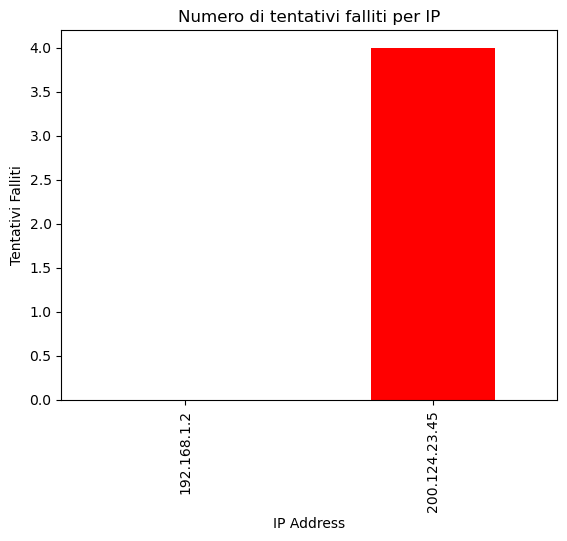

In [18]:
import matplotlib.pyplot as plt

# Visualizzare il numero di tentativi falliti per IP
attempts_by_ip = df.groupby('ip_address')['failed_attempts'].max()
attempts_by_ip.plot(kind='bar', color='red')
plt.title("Numero di tentativi falliti per IP")
plt.xlabel("IP Address")
plt.ylabel("Tentativi Falliti")
plt.show()


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Creare variabili di input (features) e target (etichetta)
X = df[['failed_attempts']]
y = df['success']

# Dividere i dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare e addestrare il modello
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Fare previsioni e calcolare l'accuratezza
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.5


In [ ]:
print("Valori previsti:", y_pred)
print("Valori reali:   ", y_test.values)


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
